In [1]:
import pandas as pd
import numpy as np

### Calculate the median GDP per capita

In [2]:
gdp = pd.read_csv('../../Processed Data/gdp.csv')

#### The FAO food consumption and depression dataset will intersect during the years 2014 - 2017. Therefore, we only select the years 2014 - 2017 in our GDP dataset.

In [3]:
gdp_14_17 = gdp[['Country Name', 'Country Code', '2014', '2015', '2016', '2017']].drop(gdp.loc[(gdp['2014'] == '..') | (gdp['2015'] == '..') | (gdp['2016'] == '..') | (gdp['2017'] == '..')].index)



c:\users\derek shao\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
c:\users\derek shao\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
c:\users\derek shao\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
c:\users\derek shao\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the futur

In [4]:
# convert the values in GDP column to numbers
gdp_14_17['2014'] = pd.to_numeric(gdp_14_17['2014'])
gdp_14_17['2015'] = pd.to_numeric(gdp_14_17['2015'])
gdp_14_17['2016'] = pd.to_numeric(gdp_14_17['2016'])
gdp_14_17['2017'] = pd.to_numeric(gdp_14_17['2017'])

#### Find the mean GDP per capita across the 4 years

In [5]:
gdp_14_17['average_GDP_capita'] = gdp_14_17[['2014', '2015', '2016', '2017']].mean(axis=1)

In [6]:
gdp_14_17.head()

,Country Name,Country Code,2014,2015,2016,2017,average_GDP_capita
0,Afghanistan,AFG,613.856689,578.466353,509.218661,519.884773,555.356619
1,Albania,ALB,4578.631994,3952.801215,4124.055726,4531.020806,4296.627435
2,Algeria,DZA,5494.352336,4187.509727,3945.482081,4111.294110,4434.659564
3,Andorra,AND,41303.929371,35762.523074,37474.665406,38962.880354,38375.999551
4,Angola,AGO,5408.410496,4166.979684,3506.072885,4095.812942,4294.319002


#### Median of average GDP per capita for years 2014 - 2017

In [7]:
median_gdp = gdp_14_17['average_GDP_capita'].median()

In [8]:
median_gdp

6078.232316246892

### Split countries by above or below median GDP

In [9]:
gdp_filtered_above = gdp_14_17.loc[(gdp_14_17['average_GDP_capita'] >= median_gdp)].drop(columns=['2014', '2015', '2016', '2017'])
gdp_filtered_below = gdp_14_17.loc[(gdp_14_17['average_GDP_capita'] < median_gdp)].drop(columns=['2014', '2015', '2016', '2017'])

In [10]:
gdp_filtered_above

,Country Name,Country Code,average_GDP_capita
3,Andorra,AND,38375.999551
5,Antigua and Barbuda,ATG,14592.176681
6,Argentina,ARG,13381.785742
8,Australia,AUS,55816.402789
9,Austria,AUT,47149.721678
...,...,...,...
218,Other small states,OSS,13548.650262
220,Post-demographic dividend,PST,41971.328514
222,Small states,SST,12290.807761
228,Upper middle income,UMC,7990.031548


In [11]:
gdp_filtered_below

,Country Name,Country Code,average_GDP_capita
0,Afghanistan,AFG,555.356619
1,Albania,ALB,4296.627435
2,Algeria,DZA,4434.659564
4,Angola,AGO,4294.319002
7,Armenia,ARM,3774.964716
...,...,...,...
223,South Asia,SAS,1638.178406
224,South Asia (IDA & IBRD),TSA,1638.178406
225,Sub-Saharan Africa,SSF,1651.492786
226,Sub-Saharan Africa (excluding high income),SSA,1639.910145


### Find the average population over years 2014, 2015, 2016, 2017

In [12]:
country_population = pd.read_csv("../../Processed Data/country_population.csv")

In [13]:
country_population = country_population[['Country Name', '2014', '2015', '2016', '2017']]

In [14]:
country_population['average'] = country_population[['2014', '2015', '2016', '2017']].mean(axis=1)

### Read food consumption data from FAO

In [15]:
fao_consumption = pd.read_csv("../../Processed Data/FAO_Consumption.csv")

### Read the Depression dataset

In [31]:
depression = pd.read_csv("../../Processed Data/depression.csv")

In [32]:
fao_consumption_filtered = fao_consumption.loc[fao_consumption['Year'].isin(['2014', '2015', '2016', '2017'])]

In [33]:
fao_consumption_filtered

,Unnamed: 0,Country Name,Year,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,0,Afghanistan,2014,8371.0,1897.0,1072.0,562.36,1873.0,684.00,110.0,1.0
1,1,Afghanistan,2015,8105.0,2263.0,1203.0,551.20,1871.0,676.00,82.0,0.0
2,2,Afghanistan,2016,8773.0,2273.0,1039.0,531.05,3154.0,628.00,51.0,30.0
3,3,Afghanistan,2017,8656.0,2221.0,1207.0,520.00,2405.0,712.00,79.0,0.0
5,5,Albania,2014,1174.0,1151.0,571.0,203.23,956.0,185.00,6.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...
863,863,Zambia,2017,4769.0,400.0,125.0,607.80,1687.0,4651.00,5.0,633.0
865,865,Zimbabwe,2014,2556.0,473.0,231.0,384.26,539.0,4559.16,14.0,542.0
866,866,Zimbabwe,2015,2366.0,447.0,303.0,374.80,545.0,4081.16,13.0,391.0
867,867,Zimbabwe,2016,2426.0,441.0,308.0,364.47,539.0,4185.15,16.0,406.0


In [34]:
np.unique(list(fao_consumption_filtered['Country Name']))

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, Taiwan Province of', 'China, mainland',
       'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Gr

In [35]:
depression_filtered = depression.loc[depression['Year'].isin(['2014', '2015', '2016', '2017'])]

## Mean the depression over the time range of 2014 - 2017 for each country

In [36]:
depression_filtered = depression_filtered.groupby('Country Name').mean().reset_index().drop(columns=['Year', 'Unnamed: 0'])

## Mean the FAO consumption for each food group over the time range of 2014 - 2017 for each country

In [37]:
fao_consumption_filtered = fao_consumption_filtered.groupby('Country Name').mean().drop(columns=['Year', 'Unnamed: 0'])

### Merge FAO consumption and Depression datasets on Country and Year

In [38]:
fao_consumption_filtered

,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
Country Name,,,,,,,,
Afghanistan,8476.25,2163.50,1130.25,541.1525,2325.75,675.0000,80.50,7.75
Albania,1174.00,1163.50,606.50,211.1175,1018.75,189.0025,7.50,107.00
Algeria,16356.50,3974.00,4225.00,1468.8950,11326.25,2530.7650,148.50,230.50
Angola,12883.25,286.50,4739.50,1461.0400,11241.25,1623.8850,17.50,1927.50
Antigua and Barbuda,10.00,6.50,15.25,14.0075,8.50,12.0000,0.00,5.25
...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),7823.00,3547.25,2648.00,2217.2775,2582.25,6663.6350,73.00,1767.50
Viet Nam,50383.00,761.25,7925.50,10888.3025,19904.75,21522.0900,97.25,1702.00
Yemen,5312.00,356.75,790.25,639.9700,732.25,1075.2600,15.25,7.75


In [39]:
FAO_consumption_depression = depression_filtered.merge(fao_consumption_filtered, left_on=['Country Name'], right_on=['Country Name'], how='right')

In [54]:
FAO_consumption_depression

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,Afghanistan,9.225020e+05,8476.25,2163.50,1130.25,541.1525,2325.75,675.0000,80.50,7.75
1,Albania,6.930178e+04,1174.00,1163.50,606.50,211.1175,1018.75,189.0025,7.50,107.00
2,Algeria,1.362142e+06,16356.50,3974.00,4225.00,1468.8950,11326.25,2530.7650,148.50,230.50
3,Angola,7.862751e+05,12883.25,286.50,4739.50,1461.0400,11241.25,1623.8850,17.50,1927.50
4,Antigua and Barbuda,2.399117e+03,10.00,6.50,15.25,14.0075,8.50,12.0000,0.00,5.25
...,...,...,...,...,...,...,...,...,...,...
169,Venezuela (Bolivarian Republic of),NaN,7823.00,3547.25,2648.00,2217.2775,2582.25,6663.6350,73.00,1767.50
170,Viet Nam,NaN,50383.00,761.25,7925.50,10888.3025,19904.75,21522.0900,97.25,1702.00
171,Yemen,9.131212e+05,5312.00,356.75,790.25,639.9700,732.25,1075.2600,15.25,7.75
172,Zambia,4.082987e+05,4637.25,402.75,135.50,544.2925,1608.50,4661.7500,8.25,524.00


## Merge FAO consumption + depression dataset with the country population

In [55]:
# the country names are not the same from the FAO dataset to Depression dataset, therefore when we join by country,
# we need to change the country name

country_name_changes = {'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
'Viet Nam': 'Vietnam',
 'United States of America': 'United States',
 'United Republic of Tanzania': 'Tanzania',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
 'Slovakia': 'Slovak Republic',
 'Saint Lucia': 'St. Lucia',
 'Republic of Moldova': 'Moldova',
 "Democratic People's Republic of Korea":'Korea, Dem. People’s Rep.', 
 'Republic of Korea':'Korea, Rep.',
 'Kyrgyzstan': 'Kyrgyz Republic',
 'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
 'Gambia': 'Gambia, The',
 'Egypt': 'Egypt, Arab Rep.',
  "Côte d'Ivoire": "Cote d'Ivoire",
 'China, Hong Kong SAR': 'Hong Kong SAR, China',
 'China, Macao SAR':'Macao SAR, China',
 'China, mainland': 'China',
 'Bolivia (Plurinational State of)':'Bolivia',
 'Bahamas':'Bahamas, The',
 'Yemen': 'Yemen, Rep.'
}

In [56]:
def change_to_match_name(name):
    if name in country_name_changes.keys():
        return country_name_changes[name]
    else:
        return name

In [58]:
FAO_consumption_depression['Country Name'] = FAO_consumption_depression['Country Name'].apply(change_to_match_name)

In [60]:
FAO_consumption_depression_country = pd.merge(FAO_consumption_depression, country_population[['Country Name', 'average']], left_on=['Country Name'], right_on=['Country Name'], how='left')

In [61]:
FAO_consumption_depression_country

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,average
0,Afghanistan,9.225020e+05,8476.25,2163.50,1130.25,541.1525,2325.75,675.0000,80.50,7.75,34865981.25
1,Albania,6.930178e+04,1174.00,1163.50,606.50,211.1175,1018.75,189.0025,7.50,107.00,2879841.25
2,Algeria,1.362142e+06,16356.50,3974.00,4225.00,1468.8950,11326.25,2530.7650,148.50,230.50,40148078.50
3,Angola,7.862751e+05,12883.25,286.50,4739.50,1461.0400,11241.25,1623.8850,17.50,1927.50,28371348.00
4,Antigua and Barbuda,2.399117e+03,10.00,6.50,15.25,14.0075,8.50,12.0000,0.00,5.25,94020.25
...,...,...,...,...,...,...,...,...,...,...,...
173,"Yemen, Rep.",9.131212e+05,5312.00,356.75,790.25,639.9700,732.25,1075.2600,15.25,7.75,26831101.25
174,Zambia,4.082987e+05,4637.25,402.75,135.50,544.2925,1608.50,4661.7500,8.25,524.00,16124077.25
175,Zambia,4.082987e+05,4637.25,402.75,135.50,544.2925,1608.50,4661.7500,8.25,524.00,16124077.25
176,Zimbabwe,3.258312e+05,2532.50,446.25,283.50,369.0750,540.00,4156.6400,14.00,446.00,13917111.25


In [62]:
consumption_columns = FAO_consumption_depression_country.drop(columns=['Country Name', 'Depression Count']).columns

In [63]:
consumption_columns

Index(['GBL Consumption', 'Dairy Consumption', 'Fruits Consumption',
       'Meat Consumption', 'Vegetables Consumption', 'Confections Consumption',
       'Caffeine Consumption', 'Alcohol Consumption', 'average'],
      dtype='object')

### Total consumption for each country

##### Get food consumption compositions

We divide the food group consumption by the total consumption to calculate the percentage.

In [64]:
FAO_consumption_depression_country["GBL_percentage"] = FAO_consumption_depression_country['GBL Consumption'].div(FAO_consumption_depression_country['average'])
FAO_consumption_depression_country["Dairy_percentage"] = FAO_consumption_depression_country['Dairy Consumption'].div(FAO_consumption_depression_country['average'])
FAO_consumption_depression_country["Fruits_percentage"] = FAO_consumption_depression_country['Fruits Consumption'].div(FAO_consumption_depression_country['average'])
FAO_consumption_depression_country["Meat_percentage"] = FAO_consumption_depression_country['Meat Consumption'].div(FAO_consumption_depression_country['average'])
FAO_consumption_depression_country["Vegetables_percentage"] = FAO_consumption_depression_country['Vegetables Consumption'].div(FAO_consumption_depression_country['average'])
FAO_consumption_depression_country["Confections_percentage"] = FAO_consumption_depression_country['Confections Consumption'].div(FAO_consumption_depression_country['average'])
FAO_consumption_depression_country["Caffeine_percentage"] = FAO_consumption_depression_country['Caffeine Consumption'].div(FAO_consumption_depression_country['average'])
FAO_consumption_depression_country["Alcohol_percentage"] = FAO_consumption_depression_country['Alcohol Consumption'].div(FAO_consumption_depression_country['average'])

In [65]:
FAO_consumption_depression_country

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,average,GBL_percentage,Dairy_percentage,Fruits_percentage,Meat_percentage,Vegetables_percentage,Confections_percentage,Caffeine_percentage,Alcohol_percentage
0,Afghanistan,9.225020e+05,8476.25,2163.50,1130.25,541.1525,2325.75,675.0000,80.50,7.75,34865981.25,0.000243,0.000062,0.000032,0.000016,0.000067,0.000019,2.308841e-06,2.222797e-07
1,Albania,6.930178e+04,1174.00,1163.50,606.50,211.1175,1018.75,189.0025,7.50,107.00,2879841.25,0.000408,0.000404,0.000211,0.000073,0.000354,0.000066,2.604310e-06,3.715483e-05
2,Algeria,1.362142e+06,16356.50,3974.00,4225.00,1468.8950,11326.25,2530.7650,148.50,230.50,40148078.50,0.000407,0.000099,0.000105,0.000037,0.000282,0.000063,3.698807e-06,5.741246e-06
3,Angola,7.862751e+05,12883.25,286.50,4739.50,1461.0400,11241.25,1623.8850,17.50,1927.50,28371348.00,0.000454,0.000010,0.000167,0.000051,0.000396,0.000057,6.168195e-07,6.793826e-05
4,Antigua and Barbuda,2.399117e+03,10.00,6.50,15.25,14.0075,8.50,12.0000,0.00,5.25,94020.25,0.000106,0.000069,0.000162,0.000149,0.000090,0.000128,0.000000e+00,5.583903e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,"Yemen, Rep.",9.131212e+05,5312.00,356.75,790.25,639.9700,732.25,1075.2600,15.25,7.75,26831101.25,0.000198,0.000013,0.000029,0.000024,0.000027,0.000040,5.683703e-07,2.888439e-07
174,Zambia,4.082987e+05,4637.25,402.75,135.50,544.2925,1608.50,4661.7500,8.25,524.00,16124077.25,0.000288,0.000025,0.000008,0.000034,0.000100,0.000289,5.116572e-07,3.249798e-05
175,Zambia,4.082987e+05,4637.25,402.75,135.50,544.2925,1608.50,4661.7500,8.25,524.00,16124077.25,0.000288,0.000025,0.000008,0.000034,0.000100,0.000289,5.116572e-07,3.249798e-05
176,Zimbabwe,3.258312e+05,2532.50,446.25,283.50,369.0750,540.00,4156.6400,14.00,446.00,13917111.25,0.000182,0.000032,0.000020,0.000027,0.000039,0.000299,1.005956e-06,3.204688e-05


### Normalization by population

In [67]:
normalized_values = FAO_consumption_depression_country[['Depression Count',
 'GBL Consumption',
 'Dairy Consumption',
 'Fruits Consumption',
 'Meat Consumption',
 'Vegetables Consumption',
 'Confections Consumption',
 'Caffeine Consumption',
 'Alcohol Consumption']].div(FAO_consumption_depression_country['average'], axis=0)

In [68]:
normalized_values

,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,0.026459,0.000243,0.000062,0.000032,0.000016,0.000067,0.000019,2.308841e-06,2.222797e-07
1,0.024064,0.000408,0.000404,0.000211,0.000073,0.000354,0.000066,2.604310e-06,3.715483e-05
2,0.033928,0.000407,0.000099,0.000105,0.000037,0.000282,0.000063,3.698807e-06,5.741246e-06
3,0.027714,0.000454,0.000010,0.000167,0.000051,0.000396,0.000057,6.168195e-07,6.793826e-05
4,0.025517,0.000106,0.000069,0.000162,0.000149,0.000090,0.000128,0.000000e+00,5.583903e-05
...,...,...,...,...,...,...,...,...,...
173,0.034032,0.000198,0.000013,0.000029,0.000024,0.000027,0.000040,5.683703e-07,2.888439e-07
174,0.025322,0.000288,0.000025,0.000008,0.000034,0.000100,0.000289,5.116572e-07,3.249798e-05
175,0.025322,0.000288,0.000025,0.000008,0.000034,0.000100,0.000289,5.116572e-07,3.249798e-05
176,0.023412,0.000182,0.000032,0.000020,0.000027,0.000039,0.000299,1.005956e-06,3.204688e-05


###### Update the columns with the normalized values.

In [71]:
FAO_consumption_depression_country.update(normalized_values)

In [73]:
FAO_consumption_depression_country

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,average,GBL_percentage,Dairy_percentage,Fruits_percentage,Meat_percentage,Vegetables_percentage,Confections_percentage,Caffeine_percentage,Alcohol_percentage
0,Afghanistan,0.026459,0.000243,0.000062,0.000032,0.000016,0.000067,0.000019,2.308841e-06,2.222797e-07,34865981.25,0.000243,0.000062,0.000032,0.000016,0.000067,0.000019,2.308841e-06,2.222797e-07
1,Albania,0.024064,0.000408,0.000404,0.000211,0.000073,0.000354,0.000066,2.604310e-06,3.715483e-05,2879841.25,0.000408,0.000404,0.000211,0.000073,0.000354,0.000066,2.604310e-06,3.715483e-05
2,Algeria,0.033928,0.000407,0.000099,0.000105,0.000037,0.000282,0.000063,3.698807e-06,5.741246e-06,40148078.50,0.000407,0.000099,0.000105,0.000037,0.000282,0.000063,3.698807e-06,5.741246e-06
3,Angola,0.027714,0.000454,0.000010,0.000167,0.000051,0.000396,0.000057,6.168195e-07,6.793826e-05,28371348.00,0.000454,0.000010,0.000167,0.000051,0.000396,0.000057,6.168195e-07,6.793826e-05
4,Antigua and Barbuda,0.025517,0.000106,0.000069,0.000162,0.000149,0.000090,0.000128,0.000000e+00,5.583903e-05,94020.25,0.000106,0.000069,0.000162,0.000149,0.000090,0.000128,0.000000e+00,5.583903e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,"Yemen, Rep.",0.034032,0.000198,0.000013,0.000029,0.000024,0.000027,0.000040,5.683703e-07,2.888439e-07,26831101.25,0.000198,0.000013,0.000029,0.000024,0.000027,0.000040,5.683703e-07,2.888439e-07
174,Zambia,0.025322,0.000288,0.000025,0.000008,0.000034,0.000100,0.000289,5.116572e-07,3.249798e-05,16124077.25,0.000288,0.000025,0.000008,0.000034,0.000100,0.000289,5.116572e-07,3.249798e-05
175,Zambia,0.025322,0.000288,0.000025,0.000008,0.000034,0.000100,0.000289,5.116572e-07,3.249798e-05,16124077.25,0.000288,0.000025,0.000008,0.000034,0.000100,0.000289,5.116572e-07,3.249798e-05
176,Zimbabwe,0.023412,0.000182,0.000032,0.000020,0.000027,0.000039,0.000299,1.005956e-06,3.204688e-05,13917111.25,0.000182,0.000032,0.000020,0.000027,0.000039,0.000299,1.005956e-06,3.204688e-05


### Rename Depression Count to Depression Rate for a more accurate column name

In [75]:
FAO_consumption_depression_country = FAO_consumption_depression_country.rename(columns={'Depression Count': 'Depression Rate'})

### Perform correlation analysis for countries above the median GDP per capita

In [76]:
gdp_filtered_above

,Country Name,Country Code,average_GDP_capita
3,Andorra,AND,38375.999551
5,Antigua and Barbuda,ATG,14592.176681
6,Argentina,ARG,13381.785742
8,Australia,AUS,55816.402789
9,Austria,AUT,47149.721678
...,...,...,...
218,Other small states,OSS,13548.650262
220,Post-demographic dividend,PST,41971.328514
222,Small states,SST,12290.807761
228,Upper middle income,UMC,7990.031548


In [77]:
FAO_above_gdp = pd.merge(FAO_consumption_depression_country, gdp_filtered_above, left_on=['Country Name'], right_on=['Country Name'])

In [88]:
FAO_above_gdp.dropna()

,Country Name,Depression Rate,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,...,GBL_percentage,Dairy_percentage,Fruits_percentage,Meat_percentage,Vegetables_percentage,Confections_percentage,Caffeine_percentage,Alcohol_percentage,Country Code,average_GDP_capita
0,Antigua and Barbuda,0.025517,0.000106,0.000069,0.000162,0.000149,0.000090,0.000128,0.000000e+00,0.000056,...,0.000106,0.000069,0.000162,0.000149,0.000090,0.000128,0.000000e+00,0.000056,ATG,14592.176681
1,Argentina,0.035681,0.001808,0.000216,0.000110,0.000152,0.000122,0.000568,6.659492e-06,0.000071,...,0.001808,0.000216,0.000110,0.000152,0.000122,0.000568,6.659492e-06,0.000071,ARG,13381.785742
2,Australia,0.044393,0.000660,0.000355,0.000136,0.000178,0.000133,0.001484,7.847264e-06,0.000111,...,0.000660,0.000355,0.000136,0.000178,0.000133,0.001484,7.847264e-06,0.000111,AUS,55816.402789
3,Austria,0.036770,0.000724,0.000354,0.000122,0.000126,0.000185,0.000585,8.092551e-06,0.000138,...,0.000724,0.000354,0.000122,0.000126,0.000185,0.000585,8.092551e-06,0.000138,AUT,47149.721678
4,"Bahamas, The",0.026317,0.000097,0.000032,0.000160,0.000140,0.000113,0.000265,3.323295e-06,0.000056,...,0.000097,0.000032,0.000160,0.000140,0.000113,0.000265,3.323295e-06,0.000056,BHS,31389.100265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Thailand,0.037242,0.000678,0.000017,0.000114,0.000071,0.000135,0.001481,5.230003e-07,0.000048,...,0.000678,0.000017,0.000114,0.000071,0.000135,0.001481,5.230003e-07,0.000048,THA,6094.769151
70,Trinidad and Tobago,0.035681,0.000236,0.000031,0.000074,0.000110,0.000074,0.000100,7.280264e-07,0.000030,...,0.000236,0.000031,0.000074,0.000110,0.000074,0.000100,7.280264e-07,0.000030,TTO,17743.926068
71,Turkey,0.037628,0.000571,0.000242,0.000144,0.000063,0.000266,0.000292,3.931352e-06,0.000015,...,0.000571,0.000242,0.000144,0.000063,0.000266,0.000292,3.931352e-06,0.000015,TUR,11162.595190
72,United Arab Emirates,0.034187,0.000470,0.000062,0.000124,0.000132,0.000175,0.000185,7.260499e-06,0.000024,...,0.000470,0.000062,0.000124,0.000132,0.000175,0.000185,7.260499e-06,0.000024,ARE,40300.468374


In [79]:
FAO_above_gdp.columns

Index(['Country Name', 'Depression Rate', 'GBL Consumption',
       'Dairy Consumption', 'Fruits Consumption', 'Meat Consumption',
       'Vegetables Consumption', 'Confections Consumption',
       'Caffeine Consumption', 'Alcohol Consumption', 'average',
       'GBL_percentage', 'Dairy_percentage', 'Fruits_percentage',
       'Meat_percentage', 'Vegetables_percentage', 'Confections_percentage',
       'Caffeine_percentage', 'Alcohol_percentage', 'Country Code',
       'average_GDP_capita'],
      dtype='object')

### Pairwise scatter plots - consumption percentage (i.e., percentage of a food group consumed out of total food consumed)

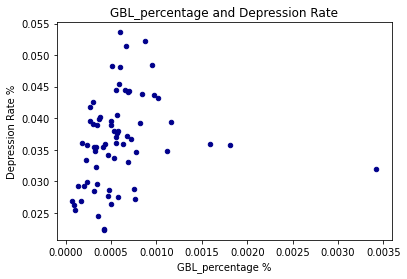

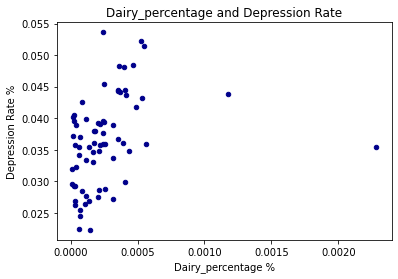

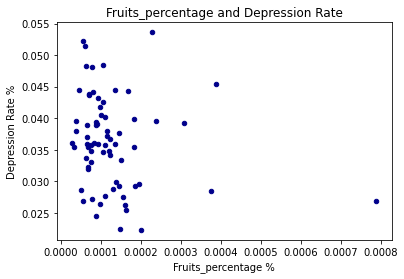

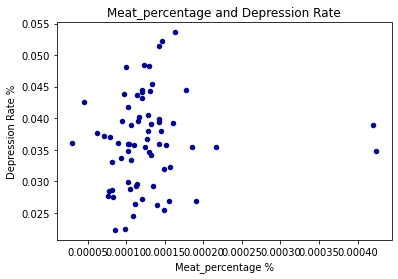

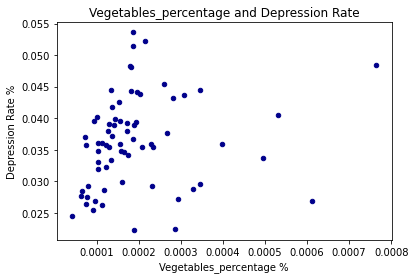

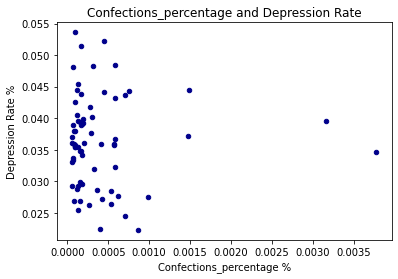

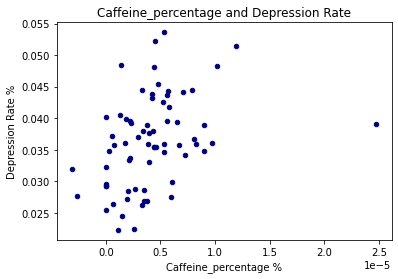

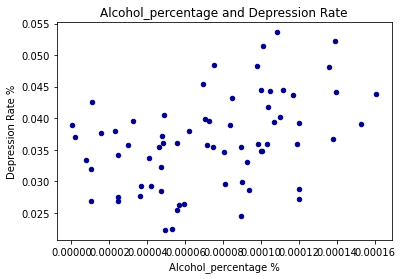

In [89]:
for column in ['GBL_percentage',
 'Dairy_percentage',
 'Fruits_percentage',
 'Meat_percentage',
 'Vegetables_percentage',
 'Confections_percentage',
 'Caffeine_percentage',
 'Alcohol_percentage']:
    
    ax1 = FAO_above_gdp.dropna().plot.scatter(x=column,
                          y='Depression Rate',
                          c='DarkBlue')
    
    ax1.title.set_text(f'{column} and Depression Rate')
    ax1.set_xlabel(f'{column} %')
    ax1.set_ylabel("Depression Rate %")
    
    fig = ax1.get_figure()
    
    # Uncomment to save figure
    # fig.savefig(f'images/{column}_above.png')

<AxesSubplot:>

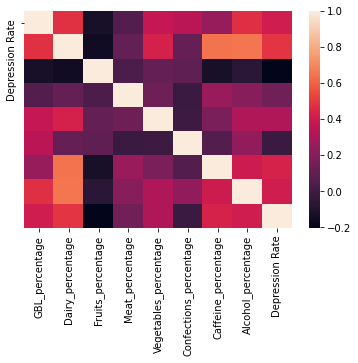

In [90]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = FAO_above_gdp.dropna()[['GBL_percentage',
 'Dairy_percentage',
 'Fruits_percentage',
 'Meat_percentage',
 'Vegetables_percentage',
 'Confections_percentage',
 'Caffeine_percentage',
 'Alcohol_percentage', 'Depression Rate', 'Country Name']].groupby(['Country Name']).sum().reset_index().corr(method='spearman')

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=['Depression Rate'])

In [91]:
corr.loc['Depression Rate']

GBL_percentage            0.410011
Dairy_percentage          0.488710
Fruits_percentage        -0.205590
Meat_percentage           0.145670
Vegetables_percentage     0.315966
Confections_percentage   -0.021776
Caffeine_percentage       0.432144
Alcohol_percentage        0.410011
Depression Rate           1.000000
Name: Depression Rate, dtype: float64